In [2]:
#source
#https://raposa.trade/blog/use-python-to-trade-the-donchian-channel/
#https://twopirllc.github.io/pandas-ta/
from datetime import datetime
import vectorbt as vbt
import yfinance as yf
import os
from talipp.indicators import EMA, SMA, Stoch, RSI
import pytz                     # Time zone management
import pandas            as pd  # Mostly for Data frame manipulation
import matplotlib.pyplot as plt # Plotting charts
import numpy             as np  # Mostly for array manipulation
import pandas_ta as ta
import matplotlib.pyplot as plt
#plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
%run "C:\\Users\\adamj\\Documents\\Projekty_Python\\Quant_trading\\Plotting_backtesting.ipynb"

In [4]:
#tickers:
#tesla TSLA
#spx500 ^GSPC
#EURUSD=X
#amazon amzn
#yahoo finance data
start_date = '2023-01-01'
end_date = '2023-08-19'
symbol = 'EURUSD=X'
# Download the stock price data from Yahoo Finance API
data = yf.download(symbol, start=start_date, end=end_date,interval='1h' )

[*********************100%***********************]  1 of 1 completed


In [6]:
donchiandf = ta.donchian(data["High"], data["Low"], lower_length=20, upper_length=20)
frames = [data, donchiandf]  
df = pd.concat(frames, axis=1)
df.columns = [x.lower() for x in df.columns]

In [7]:
df["ema200"] = df['close'].ewm(span=200, adjust=False, min_periods=12).mean()
df['entries'] = [False]*len(df['open'])
df['exits'] = [False]*len(df['open'])
df['sell_entries'] = [False]*len(df['open'])
df['sell_exits'] = [False]*len(df['open'])

In [11]:
pd.options.mode.chained_assignment = None  # default='warn'
open_long = False
open_short = False
for i in range(1,len(df['open'])):
    if (df['close'][i] > df['dcu_20_20'][i-1] and open_long == False and df['open'][i] > df['ema200'][i]):
        df['entries'][i+1] = True
        open_long = True
    if df['dcu_20_20'][i] < df['dcu_20_20'][i-1]:
        open_long = False
       

#closing BUY position    
for i in range(1, len(df['open'])):
    if(df['entries'][i] == True):
        k=i
        while k < len(df['open']):
            if(df['close'][k] < df['dcl_20_20'][k-1]):
                df['exits'][k+1] = True
                break
            k=k+1
        

#entries SELL position
for i in range(1, len(df['open'])):
    if (df['close'][i] < df['dcl_20_20'][i-1] and open_short == False and df['open'][i] < df['ema200'][i]):
        df['sell_entries'][i+1] = True
        open_short = True
    if df['dcl_20_20'][i] > df['dcl_20_20'][i-1]:
        open_short = False

#closing SELL position    
for i in range(1, len(df['open'])):
    if(df['sell_entries'][i] == True):
        k=i
        while k < len(df['open']):
            if(df['close'][k] > df['dcu_20_20'][k-1]):
                df['sell_exits'][k+1] = True
                break
            k=k+1   



In [12]:
entries = df['entries']
exits = df['exits']
short_entries = df['sell_entries']
short_exits = df['sell_exits']
data= df['close']
#modeling
pf = vbt.Portfolio.from_signals(data,entries, exits ,short_entries,short_exits, init_cash=10000,fees= 0.002)#, size_type='percent', size=0.05
#pf.total_profit()
pf.stats()

C:\Users\adamj\anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

C:\Users\adamj\anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

C:\Users\adamj\anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

C:\Users\adamj\anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                             0.000000
End                            3924.000000
Period                         3925.000000
Start Value                   10000.000000
End Value                      7363.630457
Total Return [%]                -26.363695
Benchmark Return [%]              1.544143
Max Gross Exposure [%]          100.000000
Total Fees Paid                2239.384338
Max Drawdown [%]                 26.410161
Max Drawdown Duration          3889.000000
Total Trades                     65.000000
Total Closed Trades              65.000000
Total Open Trades                 0.000000
Open Trade PnL                    0.000000
Win Rate [%]                     18.461538
Best Trade [%]                    1.266760
Worst Trade [%]                  -1.705796
Avg Winning Trade [%]             0.442385
Avg Losing Trade [%]             -0.675469
Avg Winning Trade Duration       74.083333
Avg Losing Trade Duration        31.132075
Profit Factor                     0.150712
Expectancy 

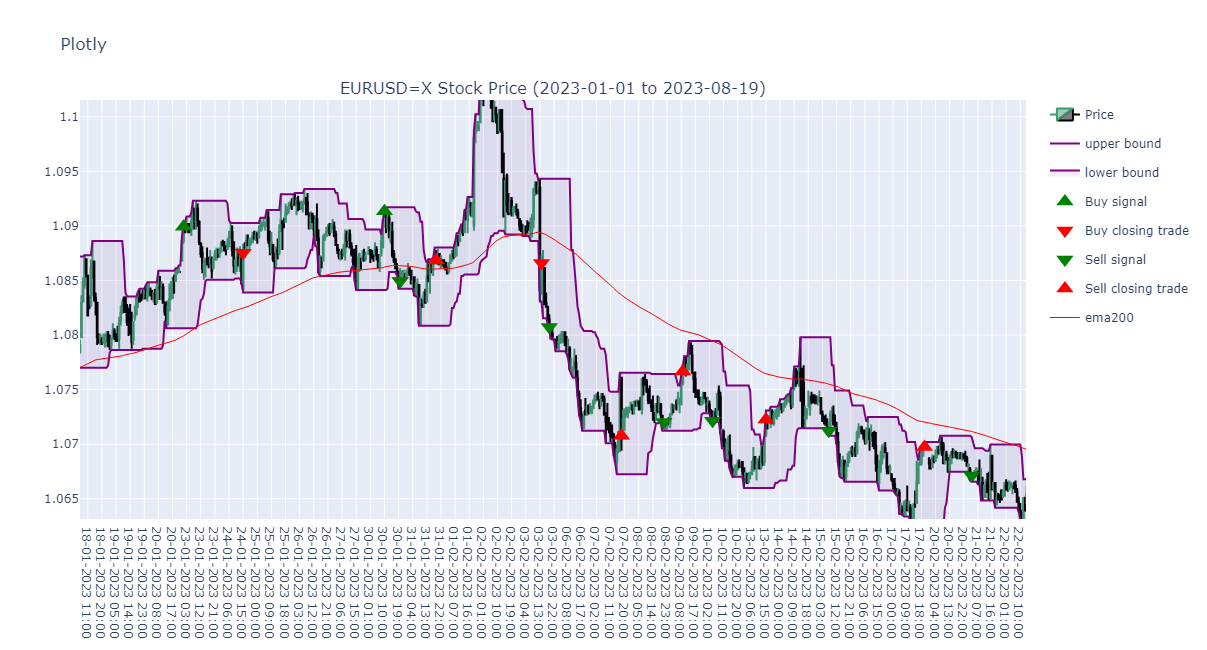

In [13]:
ploting_donchian_channels(df)

In [193]:
df[(df['entries']==True)| (df['sell_entries']==True)]

,date,open,high,low,close,adj close,volume,dcl_20_20,dcm_20_20,dcu_20_20,ema200,entries,exits,sell_entries,sell_exits
44,09-05-2023 11:30,106.330002,106.599998,105.919998,106.125000,106.125000,4985387,103.550003,105.170002,106.790001,104.056778,True,False,False,False
134,26-05-2023 10:30,118.390099,121.190002,118.390099,120.745003,120.745003,19840474,114.309998,117.750000,121.190002,110.188653,True,False,False,False
207,12-06-2023 13:30,125.834999,126.209999,125.730003,125.929604,125.929604,4166752,120.629997,123.419998,126.209999,117.169432,True,False,False,False
253,22-06-2023 10:30,128.755005,129.990005,128.052307,129.319901,129.319901,14949869,123.849998,126.920002,129.990005,120.461692,True,False,False,False
348,13-07-2023 10:30,132.998505,133.830002,132.710007,133.270004,133.270004,8141932,126.220001,130.445000,134.669998,125.888725,True,False,False,False
381,19-07-2023 15:30,135.750000,135.869995,135.320007,135.360001,135.360001,5045251,131.354996,133.672501,135.990005,128.236038,True,False,False,False
411,26-07-2023 10:30,128.029999,128.134995,126.180000,127.559998,127.559998,8535037,126.110001,128.885002,131.660004,128.590501,False,False,True,False
418,27-07-2023 10:30,131.439697,132.279495,131.240005,132.270004,132.270004,5933072,126.110001,129.370003,132.630005,128.617421,True,False,False,False
448,02-08-2023 12:30,126.892799,128.259995,126.879997,128.179993,128.179993,4588176,126.820000,130.344997,133.869995,129.346679,False,False,True,False
460,04-08-2023 10:30,141.449997,143.630005,141.350006,142.940094,142.940094,24543457,126.410004,135.020004,143.630005,129.535488,True,False,False,False
